In [3]:
from sklearn.model_selection import train_test_split
import pandas as pd
import sklearn

# 데이터 로드
data = pd.read_csv('C:/Users/임진성/Desktop/LSTM_V1/your_data.csv')
data

,url,type
0,br-icloud.com.br,phishing
1,mp3raid.com/music/krizz_kaliko.html,benign
2,bopsecrets.org/rexroth/cr/1.htm,benign
3,http://www.garage-pirenne.be/index.php?option=...,defacement
4,http://adventure-nicaragua.net/index.php?optio...,defacement
...,...,...
651186,xbox360.ign.com/objects/850/850402.html,phishing
651187,games.teamxbox.com/xbox-360/1860/Dead-Space/,phishing
651188,www.gamespot.com/xbox360/action/deadspace/,phishing
651189,en.wikipedia.org/wiki/Dead_Space_(video_game),phishing


In [4]:
malicious_data=data
malicious_data['type'].value_counts()

type
benign        428103
defacement     96457
phishing       94111
malware        32520
Name: count, dtype: int64

In [7]:
type_mapping = {
    'malware': 3,
    'defacement': 2,
    'phishing': 1,
    'benign': 0
}
malicious_data['type'] = malicious_data['type'].map(type_mapping)
malicious_data

,url,type
0,br-icloud.com.br,1
1,mp3raid.com/music/krizz_kaliko.html,0
2,bopsecrets.org/rexroth/cr/1.htm,0
3,http://www.garage-pirenne.be/index.php?option=...,2
4,http://adventure-nicaragua.net/index.php?optio...,2
...,...,...
651186,xbox360.ign.com/objects/850/850402.html,1
651187,games.teamxbox.com/xbox-360/1860/Dead-Space/,1
651188,www.gamespot.com/xbox360/action/deadspace/,1
651189,en.wikipedia.org/wiki/Dead_Space_(video_game),1


In [9]:
def get_url_len(url):
    return len(url)
get_url_len('mp3raid.com/music/krizz_kaliko.html')

malicious_data['url_length'] = malicious_data['url'].str.len()
malicious_data.head()

,url,type,url_length
0,br-icloud.com.br,1,16
1,mp3raid.com/music/krizz_kaliko.html,0,35
2,bopsecrets.org/rexroth/cr/1.htm,0,31
3,http://www.garage-pirenne.be/index.php?option=...,2,88
4,http://adventure-nicaragua.net/index.php?optio...,2,235


In [11]:
import re

def count_special_chars(url):
    non_alpha_num = re.findall(r'\W',url)
    return len(non_alpha_num)

malicious_data['special_chars_count'] = malicious_data['url'].apply(count_special_chars)
malicious_data

,url,type,url_length,special_chars_count
0,br-icloud.com.br,1,16,3
1,mp3raid.com/music/krizz_kaliko.html,0,35,4
2,bopsecrets.org/rexroth/cr/1.htm,0,31,5
3,http://www.garage-pirenne.be/index.php?option=...,2,88,16
4,http://adventure-nicaragua.net/index.php?optio...,2,235,13
...,...,...,...,...
651186,xbox360.ign.com/objects/850/850402.html,1,39,6
651187,games.teamxbox.com/xbox-360/1860/Dead-Space/,1,44,8
651188,www.gamespot.com/xbox360/action/deadspace/,1,42,6
651189,en.wikipedia.org/wiki/Dead_Space_(video_game),1,45,6


In [13]:
from urllib.parse import urlparse
import ipaddress

def has_ip_address(url):
    try:
        parsed_url = urlparse(url)
        if parsed_url.hostname:
            ip = ipaddress.ip_address(parsed_url.hostname)
            return isinstance(ip, (ipaddress.IPv4Address, ipaddress.IPv6Address))
    except ValueError:
        pass  
    return 0

malicious_data['has_ip'] = malicious_data['url'].apply(has_ip_address)
malicious_data['has_ip'] = malicious_data['has_ip'].astype(int)
malicious_data['has_ip'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 651191 entries, 0 to 651190
Series name: has_ip
Non-Null Count   Dtype
--------------   -----
651191 non-null  int32
dtypes: int32(1)
memory usage: 2.5 MB


In [15]:
from urllib.parse import urlparse

def is_shortened_url(url):
    # 축약 URL 서비스의 정확한 도메인 리스트
    shortened_services = {
        "bit.ly", "tinyurl.com", "goo.gl", "t.co", "ow.ly", "buff.ly", 
        "is.gd", "adf.ly", "bit.do", "cutt.ly", "v.gd", "shorte.st", 
        "bl.ink", "x.co", "s.id", "trib.al"
    }
    
    parsed_url = urlparse(url)
    netloc = parsed_url.netloc.lower()

    # 정확히 도메인과 일치하는 경우에만 1 반환
    return 1 if netloc in shortened_services else 0

malicious_data['shortened'] = malicious_data['url'].apply(is_shortened_url)
malicious_data[malicious_data['shortened'] == 1]

,url,type,url_length,special_chars_count,has_ip,shortened
93007,http://bit.ly/R1Y0kU?2000.Ford.F250.Lariat/130...,1,105,14,0,1
128002,http://bit.ly/M77GIA?ferias=93840923804983,1,42,7,0,1
448721,http://bit.ly/X0QmNx?2007.Subaru.Impreza.WRX/1...,1,107,14,0,1
520404,https://bit.ly/contentfrb,1,25,5,0,1
521022,https://is.gd/E1h2RX&data=02%7C01%7C%7C5dd177b...,1,386,41,0,1
...,...,...,...,...,...,...
533664,https://buff.ly/2KeguEo,1,23,5,0,1
534411,http://t.co/ZXCtb9xgsu,1,22,5,0,1
534534,https://tinyurl.com/upgrate-email,1,33,6,0,1
534668,https://tinyurl.com/sdi-template,1,32,6,0,1


In [17]:
from urllib.parse import urlparse

def count_keywords(url):
    # 찾고자 하는 키워드 목록
    keywords = {
        "php", "index", "option", "article", "content", 
        "id", "html", "tmpl", "view", "component"
    }
    
    # URL을 소문자로 변환하여 키워드 개수 세기
    url_lower = url.lower()
    keyword_count = sum(url_lower.count(keyword) for keyword in keywords)

    # 포함된 키워드 개수 반환
    return keyword_count

# 키워드 포함 개수 컬럼 추가
malicious_data['keyword_count'] = malicious_data['url'].apply(count_keywords)

# 키워드가 하나 이상 포함된 URL만 필터링해서 출력
malicious_data_with_keywords = malicious_data[malicious_data['keyword_count'] > 0]
malicious_data_with_keywords


,url,type,url_length,special_chars_count,has_ip,shortened,keyword_count
1,mp3raid.com/music/krizz_kaliko.html,0,35,4,0,0,2
3,http://www.garage-pirenne.be/index.php?option=...,2,88,16,0,0,7
4,http://adventure-nicaragua.net/index.php?optio...,2,235,13,0,0,5
5,http://buzzfil.net/m/show-art/ils-etaient-loin...,0,118,24,0,0,1
6,espn.go.com/nba/player/_/id/3457/brandon-rush,0,45,9,0,0,1
...,...,...,...,...,...,...,...
651181,www.1up.com/do/gameOverview?cId=3159391,1,39,6,0,0,2
651182,psx.ign.com/articles/131/131835p1.html,1,38,6,0,0,2
651184,wii.ign.com/objects/142/14270799.html,1,37,6,0,0,1
651186,xbox360.ign.com/objects/850/850402.html,1,39,6,0,0,1


In [19]:
# 전체 데이터에서 학습(60%) 및 나머지(40%) 나누기
train_data, temp_data = train_test_split(malicious_data, test_size=0.4, random_state=42, stratify=data['type'])

# 나머지 데이터(40%)에서 검증(20%) 및 테스트(20%) 나누기
val_data, test_data = train_test_split(temp_data, test_size=0.5, random_state=42, stratify=temp_data['type'])

# 결과 확인
print("학습 데이터 크기:", len(train_data))
print("검증 데이터 크기:", len(val_data))
print("테스트 데이터 크기:", len(test_data))

학습 데이터 크기: 390714
검증 데이터 크기: 130238
테스트 데이터 크기: 130239


In [21]:
data.head()

,url,type,url_length,special_chars_count,has_ip,shortened,keyword_count
0,br-icloud.com.br,1,16,3,0,0,0
1,mp3raid.com/music/krizz_kaliko.html,0,35,4,0,0,2
2,bopsecrets.org/rexroth/cr/1.htm,0,31,5,0,0,0
3,http://www.garage-pirenne.be/index.php?option=...,2,88,16,0,0,7
4,http://adventure-nicaragua.net/index.php?optio...,2,235,13,0,0,5


In [23]:
trainx = train_data.drop(columns = {'type', 'url'})

x_train = trainx.iloc[:, :].values
print(x_train)
print(x_train.shape)

[[ 39   3   0   0   0]
 [ 29   6   0   0   0]
 [108  19   0   0   7]
 ...
 [ 36   4   0   0   0]
 [175  29   0   0  10]
 [ 33   4   0   0   0]]
(390714, 5)


In [25]:
import numpy as np

y_train = np.array(train_data['type'])
y_train = y_train.reshape(-1, 1)
print(y_train)
print(y_train.shape[0])

[[0]
 [1]
 [2]
 ...
 [0]
 [2]
 [1]]
390714


In [27]:
valx = val_data.drop(columns = {'type', 'url'})

x_val = valx.iloc[:, :].values
print(x_val)
print(x_val.shape)

[[ 59   9   0   0   2]
 [ 33   5   0   0   0]
 [306  15   0   0   0]
 ...
 [ 33   6   0   0   2]
 [ 15   1   0   0   0]
 [ 71   8   0   0   1]]
(130238, 5)


In [29]:
y_val = np.array(val_data['type'])
y_val = y_val.reshape(-1, 1)
print(y_val)
print(y_val.shape[0])

[[0]
 [0]
 [0]
 ...
 [1]
 [1]
 [0]]
130238


In [31]:
testx = test_data.drop(columns = {'type', 'url'})

x_test = testx.iloc[:, :].values
print(x_test)
print(x_test.shape)

[[ 50   6   0   0   2]
 [ 29   5   0   0   0]
 [ 27   3   0   0   1]
 ...
 [120  19   0   0   1]
 [ 10   2   0   0   0]
 [ 26   5   0   0   0]]
(130239, 5)


In [33]:
y_test = np.array(test_data['type'])
y_test = y_test.reshape(-1, 1)
print(y_test)
print(y_test.shape[0])

[[1]
 [0]
 [0]
 ...
 [0]
 [0]
 [0]]
130239


In [35]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense  # 필요한 경우 Dense 층도 함께 임포트


model = Sequential([
    Dense(units = 64, activation = 'relu', input_shape=(5,)),
    Dense(units = 32, activation = 'relu'),
    Dense(units = 4, activation = 'softmax')
])

In [36]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [37]:
history = model.fit(x_train, y_train, epochs=20, batch_size=128, validation_data=(x_val, y_val))

Epoch 1/20
3053/3053 [==============================] - 13s 4ms/step - loss: 0.7311 - accuracy: 0.7470 - val_loss: 0.6585 - val_accuracy: 0.7706
Epoch 2/20
3053/3053 [==============================] - 13s 4ms/step - loss: 0.6301 - accuracy: 0.7781 - val_loss: 0.6149 - val_accuracy: 0.7806
Epoch 3/20
3053/3053 [==============================] - 13s 4ms/step - loss: 0.6137 - accuracy: 0.7819 - val_loss: 0.6145 - val_accuracy: 0.7769
Epoch 4/20
3053/3053 [==============================] - 13s 4ms/step - loss: 0.6056 - accuracy: 0.7832 - val_loss: 0.6119 - val_accuracy: 0.7807
Epoch 5/20
3053/3053 [==============================] - 13s 4ms/step - loss: 0.6000 - accuracy: 0.7837 - val_loss: 0.6133 - val_accuracy: 0.7828
Epoch 6/20
3053/3053 [==============================] - 13s 4ms/step - loss: 0.5960 - accuracy: 0.7840 - val_loss: 0.6046 - val_accuracy: 0.7843
Epoch 7/20
3053/3053 [==============================] - 13s 4ms/step - loss: 0.5918 - accuracy: 0.7851 - val_loss: 0.5902 - val_ac

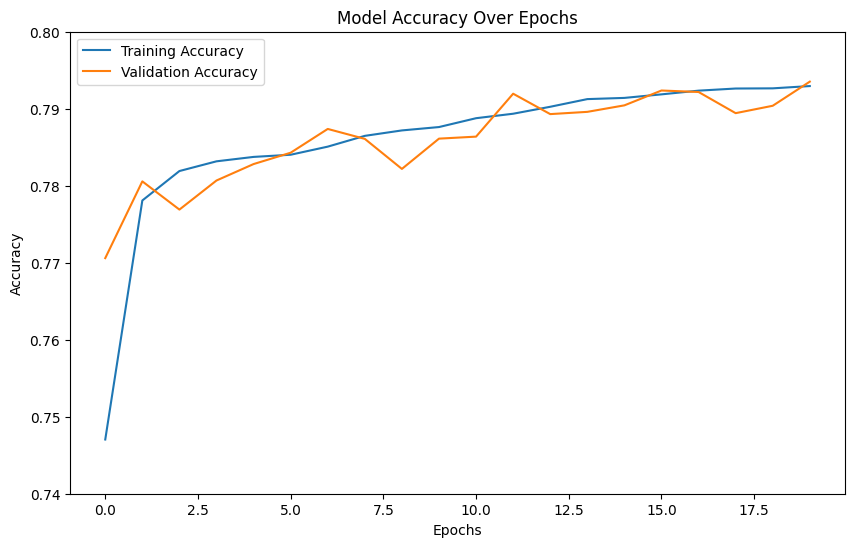

In [41]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Over Epochs')
plt.ylim(0.74, 0.8)
plt.legend()
plt.show()

In [161]:
# 최종 성능 평가: 테스트 데이터에서만 평가
loss, accuracy = model.evaluate(x_test, y_test)
print(f'Test Accuracy: {accuracy * 100:.2f}%')

4070/4070 [==============================] - 10s 3ms/step - loss: 0.5612 - accuracy: 0.7940
Test Accuracy: 79.40%


In [81]:
from tensorflow.keras.utils import plot_model
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files/Graphviz/bin'

# 모델 구조를 이미지로 저장
plot_model(model, to_file='mlp_model.png', show_shapes=True, show_layer_names=True)


You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [107]:
from sklearn.metrics import classification_report
import numpy as np

# 모델 예측
y_pred = model.predict(x_test)  # x_test는 테스트 입력 데이터
y_pred_classes = np.argmax(y_pred, axis=1)  # 예측 클래스 (원-핫 인코딩이라면 argmax 사용)

# 실제 클래스
y_true_classes = np.argmax(y_test, axis=1)  # 실제 클래스 (y_test가 원-핫 인코딩된 경우)

# 라벨 디코딩 설정 (type_mapping에 따라 조정)
type_mapping = {
    0: 'benign',
    1: 'phishing',
    2: 'defacement',
    3: 'malware'
}
label_names = [type_mapping[i] for i in sorted(type_mapping.keys())]

# Classification Report 생성
from sklearn.metrics import classification_report

# zero_division=0을 설정
report = classification_report(
    y_true_classes,
    y_pred_classes,
    target_names=label_names,
    zero_division=0
)
print("Classification Report:\n")
print(report)

4070/4070 [==============================] - 4s 912us/step
Classification Report:

              precision    recall  f1-score   support

      benign       1.00      0.81      0.89    130239
    phishing       0.00      0.00      0.00         0
  defacement       0.00      0.00      0.00         0
     malware       0.00      0.00      0.00         0

    accuracy                           0.81    130239
   macro avg       0.25      0.20      0.22    130239
weighted avg       1.00      0.81      0.89    130239



In [99]:
# 정수형 클래스 라벨인 경우
unique, counts = np.unique(y_test, return_counts=True)

# 클래스 분포 출력
print("Class distribution in y_test:")
for cls, count in zip(unique, counts):
    print(f"Class {cls}: {count} samples")


Class distribution in y_test:
Class 0: 85621 samples
Class 1: 18822 samples
Class 2: 19292 samples
Class 3: 6504 samples


In [105]:
unique_classes_in_true = np.unique(y_true_classes)
print("Classes in y_true:", unique_classes_in_true)

# 누락된 클래스 확인
missing_classes = set(unique_classes_in_true) - set(unique_classes_in_pred)
if missing_classes:
    print("Missing classes in predictions:", missing_classes)
else:
    print("All classes are predicted.")


Classes in y_true: [0]
All classes are predicted.
